In [2]:
import numpy as np


In [8]:
class OwnPCA:
    def __init__(self, ip, n = None):
        self.ip = ip
        if n is not None:
            self.n = n
        else:
            self.n = ip.shape[1]

    def pca(self):
        #normalize matrix
        self.normalize_ip = self.ip - self.ip.mean(axis=0) 
        #Step 1 - Find co-variance of the matrix
        self.covariance = np.cov(self.ip.T)
        #Step - 2 - Find eigenvalues and eigenvectors
        self.eigenvalues, self.eigenvectors = np.linalg.eig(self.covariance)
        #eigenvalues in descending order
        idx = self.eigenvalues.argsort()[::-1]   
        self.eigenvalues = self.eigenvalues[idx]
        self.eigenvectors = self.eigenvectors[:,idx]
        #Step - 3 - Take the first n principle components stated by user
        self.eigenvectors = self.eigenvectors[:,:self.n]
        #Step - 4 - Find scores by multiplying it with data
        scores = np.dot(self.normalize_ip, self.eigenvectors)
        return scores
    
    def getCovariance(self):
        return self.covariance
    
    def getEigenvalues(self):
        return self.eigenvalues
    
    def getEigenvectors(self):
        return self.eigenvectors
    
    def getAllValues(self):
        return self.covariance, self.eigenvalues, self.eigenvectors

In [9]:
#data = np.mat("2.5 2.4; 0.5 0.7; 2.2 2.9; 1.9 2.2; 3.1 3.0; 2.3 2.7; 2.0 1.6; 1.0 1.1; 1.5 1.6; 1.1 0.9")

In [10]:
#data

matrix([[ 2.5,  2.4],
        [ 0.5,  0.7],
        [ 2.2,  2.9],
        [ 1.9,  2.2],
        [ 3.1,  3. ],
        [ 2.3,  2.7],
        [ 2. ,  1.6],
        [ 1. ,  1.1],
        [ 1.5,  1.6],
        [ 1.1,  0.9]])

In [11]:
#own_pca = OwnPCA(data)
#answer = own_pca.pca()
#answer

matrix([[-0.82797019, -0.17511531],
        [ 1.77758033,  0.14285723],
        [-0.99219749,  0.38437499],
        [-0.27421042,  0.13041721],
        [-1.67580142, -0.20949846],
        [-0.9129491 ,  0.17528244],
        [ 0.09910944, -0.3498247 ],
        [ 1.14457216,  0.04641726],
        [ 0.43804614,  0.01776463],
        [ 1.22382056, -0.16267529]])

In [12]:
#data.shape[1]

2

In [13]:
import pandas as pd

In [14]:
test_data = pd.read_csv(r"C:\Users\Mithun\PycharmProjects\mlclassroom\dataset_1.csv")

In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
x    1000 non-null float64
y    1000 non-null float64
z    1000 non-null float64
dtypes: float64(3)
memory usage: 23.5 KB


In [17]:
tdata = test_data.values

In [33]:
own_pca_testdata = OwnPCA(tdata)

In [34]:
own_scores = own_pca_testdata.pca()

In [21]:
#from sklearn import decomposition

In [17]:
#pca_sklearn = decomposition.PCA(2)

In [18]:
#pca_sklearn.fit(tdata)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
#X = pca_sklearn.transform(tdata)

In [20]:
#X
#Just for verification - not needed

array([[ -1.75681915e+00,  -2.20257289e-03],
       [ -8.88177567e-01,  -1.64657996e-02],
       [  5.26487022e-02,   4.46783426e-01],
       ..., 
       [  3.60428154e-01,  -3.45422947e-01],
       [ -2.86808081e+00,   3.85070743e-01],
       [  1.52319700e+00,   1.45746184e-01]])

In [35]:
import matplotlib.pyplot as plt

In [36]:
%matplotlib inline

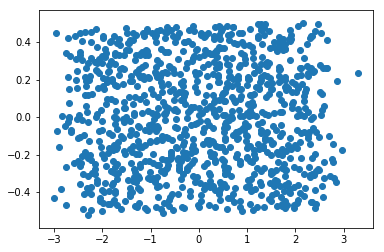

In [37]:
plt.scatter(own_scores[:,0], own_scores[:,1])
plt.show()

In [38]:
own_pca_testdata.getEigenvectors()

array([[ 0.18857784,  0.00448705,  0.982048  ],
       [ 0.98203351,  0.00623651, -0.18860355],
       [-0.00697082,  0.99997049, -0.00323037]])

In [27]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

<script>requirejs.config({paths: { 'plotly': ['https://cdn.plot.ly/plotly-latest.min']},});if(!window.Plotly) {{require(['plotly'],function(plotly) {window.Plotly=plotly;});}}</script>

In [39]:
%matplotlib inline

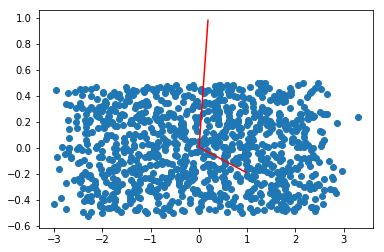

In [40]:
plt.scatter(own_scores[:,0],own_scores[:,1])
plt.plot(own_pca_testdata.getEigenvectors()[0], 
         own_pca_testdata.getEigenvectors()[1], "r")
plt.show()

In [30]:
#own_pca_testdata.getEigenvectors()[:,1]

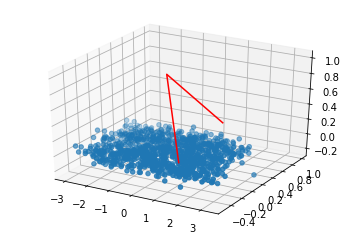

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(own_scores[:,0],own_scores[:,1], own_scores[:,2])
ax.plot(own_pca_testdata.getEigenvectors()[0], 
        own_pca_testdata.getEigenvectors()[1], 
        own_pca_testdata.getEigenvectors()[2], "r")

In [42]:
own_pca_testdata.getEigenvectors()[0][1]

0.0044870530107291567

In [43]:
own_pca_testdata.getEigenvectors()[1][0]

0.98203350585526439

In [44]:
import seaborn as sns

In [45]:
objects = ('PC1', 'PC2', 'PC3')
x_pos = np.arange(len(objects))

In [46]:
performance = [i/sum(own_pca_testdata.getEigenvalues())*100 for i in own_pca_testdata.getEigenvalues()]

In [47]:
performance

[96.291790982744203, 3.5608224832412216, 0.14738653401457716]

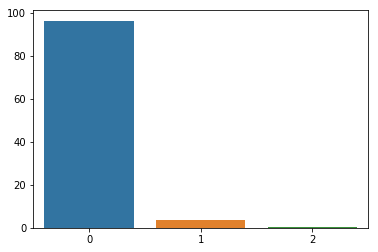

In [49]:
#Here we can see PC1 covers 96.29% data, so we can drop other two
sns.barplot(x_pos, performance)

In [50]:
mu = tdata.mean(axis=0)

In [51]:
mu

array([ 0.503454,  2.511309,  0.509261])

In [52]:
sigma = own_pca_testdata.normalize_ip.std(axis=0).mean()

In [53]:
sigma

0.67185803209868011

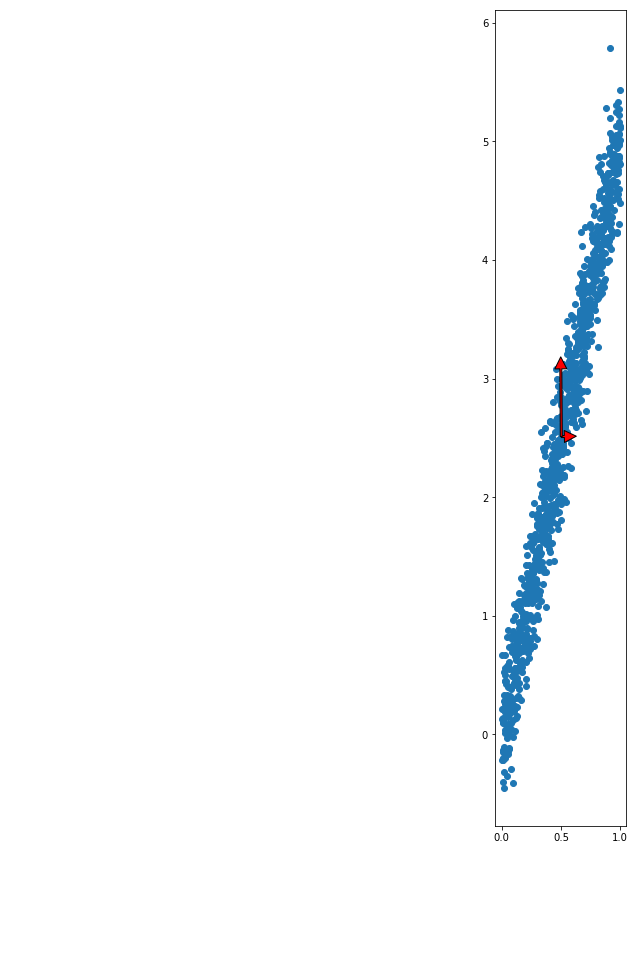

In [57]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(tdata[:,0], tdata[:,1])
for axis in own_pca_testdata.getEigenvectors()[:,:2]:
    start, end = mu[:2], mu[:2] + sigma * axis
    ax.annotate(
        '', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=2.0))
ax.set_aspect('equal')
plt.show()

In [58]:
mean_matrix = np.mean(np.mat(tdata),0)
variance_of_xyz = np.mean(np.square(np.subtract(tdata,mean_matrix)),0)

In [73]:
#variance of x, y, z
variance_of_xyz

matrix([[ 0.08052931,  2.09690259,  0.08050195]])

In [61]:
#Co-variance of x and y
np.cov(tdata[:,:2].T)
#Co-variance is 0.4020

array([[ 0.08060992,  0.40242878],
       [ 0.40242878,  2.09900159]])

In [72]:
tdata[:, 1:3]

array([[ 0.803,  0.524],
       [ 1.644,  0.532],
       [ 2.553,  0.062],
       ..., 
       [ 2.858,  0.852],
       [-0.319,  0.144],
       [ 4.012,  0.353]])

In [69]:
np.cov(tdata[:, 1:3].T)
#Co-variance is -0.014

array([[ 2.09900159, -0.01439466],
       [-0.01439466,  0.08058254]])

In [3]:
A = np.mat("0 -1; 2 3")

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvalues

array([ 1.,  2.])

In [6]:
eigenvectors

matrix([[-0.70710678,  0.4472136 ],
        [ 0.70710678, -0.89442719]])

In [7]:
#photo is attached of 3rd question step by step. The values are same of eigenvalues
#and relation of eigenvectors follows as it should